Первая часть проекта. Визуализация.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('C:\\Users\Валерия\Desktop\datasets\\All-seasons.csv')

In [3]:
df.head(10)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
5,10,1,Chef,Wow!\n
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...
7,10,1,Chef,What's the meaning of life? Why are we here?\n
8,10,1,Mrs. Garrison,I hope you're making the right choice.\n
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...


In [13]:
# сразу удаляем ненужные колонки
del df['Season']
del df['Episode']

Для начала визуализируем самые частотные слова

In [5]:
!pip install cufflinks

  Running setup.py bdist_wheel for cufflinks: started
  Running setup.py bdist_wheel for cufflinks: finished with status 'done'
  Stored in directory: C:\Users\9364~1\AppData\Local\pip\Cache\wheels\c7\7f\d3\7d3146a1551614bf0b8eb631ac724d044dd341679e763b594b
  Running setup.py bdist_wheel for retrying: started
  Running setup.py bdist_wheel for retrying: finished with status 'done'
  Stored in directory: C:\Users\9364~1\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks retrying


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Line'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Line' , 'count'])
df2.groupby('Line').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Самые популярные слова')


oh 5774
just 5230
don 4557
yeah 3705
know 3474
right 3462
like 3243
come 2614
gonna 2567
ve 2546
let 2445
ll 2354
uh 2351
think 2224
hey 2166
got 2153
okay 2138
people 2103
dude 2052
guys 1987


In [6]:
# смотрим на список всех персонажей
print(set(df.Character)) 

{'Teen Boy 1', 'Disney Exec 1', 'Boy', 'Princesses', 'Yao', 'Accordionist', 'Man in crowd', 'Soldier 7', 'Redneck 25', 'Ramdu', 'Agent Sharp', 'Cabbie', 'Older Daughter', 'Petey', 'Elderly Man 7', 'Braided Crip', 'Thad', 'Elephant Man', 'Farmer 2', 'Afro Ninja', 'Louse 9', 'Resident 4', 'Redneck 24', 'Dick Dastardly', 'Meredith Vieira', 'Strummer', 'Evan Stone', "Cartman's voice", 'Oprah', 'Fan wearing #3', 'Boy In The Red Shirt', 'Televangelist', 'Paparazzo 5', 'Redneck 23', 'The Jonas Brothers', 'Programmer 2', 'Profile 2', 'Diner 1', 'A Fan', 'M', 'Smithy', 'Voice', 'Young Worker', 'Muscleman Marc', 'Mr. Tucker', 'Deery Deer', 'Female Agent 2', 'Scientist 2', 'R. Booth', 'Denver Player', 'Bearded PeTA Member', 'Spiky Vamp', 'Road Workers', 'Cheerleader 1', 'Louse 11', 'Lucas', "Iggy's Ass", 'Officer Bob', 'DP Executive 5', 'Donald Rumsfeld', 'T-Shirt Vendor', 'HC Driver 2', 'British Delegate', 'Old Man 2', 'Another Cardinal', 'Mandy', 'Mr. Harris', 'Field Reporter', 'Woman Supporter

In [7]:
# их очень много:)
print(len(set(df.Character)))

3950


In [14]:
# группируем  героев по частотности
df.groupby(['Character']).size().sort_values(ascending=False)

Character
Cartman               9774
Stan                  7680
Kyle                  7099
Butters               2602
Randy                 2467
Mr. Garrison          1002
Chef                   917
Kenny                  881
Sharon                 862
Mr. Mackey             633
Gerald                 626
Jimmy                  597
Wendy                  585
Liane                  582
Sheila                 566
Jimbo                  556
Announcer              407
Stephen                357
Craig                  326
Clyde                  317
Jesus                  312
Linda                  290
Principal Victoria     289
Terrance               282
Mrs. Garrison          282
Token                  278
Timmy                  263
Mayor                  245
Tweek                  233
Phillip                222
                      ... 
M.C                      1
MJ's Hologram            1
Ma'am                    1
Madonna                  1
Magician                 1
Male Activist     

In [10]:
# оставляем наиболее частотных героев
new_df = df[df.Character.isin(['Kenny', 'Kyle', 'Sharon', 'Butters',  'Mr.Garrison', 'Randy', 'Cartman',  'Stan', 'Chef'])]
new_df.head(10)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
5,10,1,Chef,Wow!\n
7,10,1,Chef,What's the meaning of life? Why are we here?\n
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...
10,10,1,Stan,"Dude, how are we gonna go on? Chef was our fuh..."
17,10,1,Randy,"Good-bye, Chef! Have a great time with the Sup..."


Text(0.5,1,'Characters distribution')

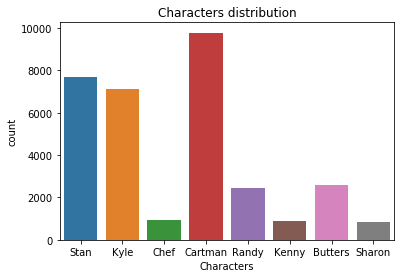

In [24]:
# посмотрим на распределение данных
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(new_df.Character)
plt.xlabel('Characters')
plt.title('Characters distribution')

Моя цель - сделать облака слов самых частотных героев. Сначала сделаем предобработку текста.

In [12]:
stopset = stopwords.words('english')
def clean_text(text):
    text = re.sub('[!"?/\\().:;,\n]', '', text).lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"ohh", "oh", text)
    text = re.sub(r"ohhh", "oh", text)
    text = re.sub(r"ohhhh", "oh", text)
    text = re.sub(r"ohhhhh", "oh", text)
    text = re.sub(r"ohhhhhh", "oh", text)
    text = re.sub(r"ahh", "ah", text)
    text = [w for w in word_tokenize(text) if w not in stopset]
    return text


In [13]:
df['Clean_lines'] = df['Line'].apply(clean_text)
df.head(10)

,Season,Episode,Character,Line,Clean_lines
0,10,1,Stan,"You guys, you guys! Chef is going away. \n","[guys, guys, chef, going, away]"
1,10,1,Kyle,Going away? For how long?\n,"[going, away, long]"
2,10,1,Stan,Forever.\n,[forever]
3,10,1,Chef,I'm sorry boys.\n,"[sorry, boys]"
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...","[chef, said, bored, joining, group, called, su..."
5,10,1,Chef,Wow!\n,[wow]
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...,"[chef, kind, questions, think, adventuring, ar..."
7,10,1,Chef,What's the meaning of life? Why are we here?\n,"[meaning, life]"
8,10,1,Mrs. Garrison,I hope you're making the right choice.\n,"[hope, making, right, choice]"
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,"[gon, na, miss, gon, na, miss, chef, iand, kno..."


Делаем облако слов по персонажу "Stan"

In [83]:
stan = df.loc[df.Character == 'Stan']

In [66]:
stan_text = str(stan['Clean_lines'])

In [60]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [67]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['na', 'back', 'away', 'go'], 
                min_font_size = 10).generate(stan_text) 

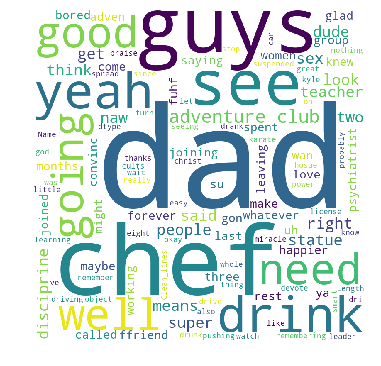

In [68]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

Делаем облако слов по персонажу "Cartman"

In [69]:
cartman = df.loc[df.Character == 'Cartman']
cartman_text = str(cartman['Clean_lines'])

In [70]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [72]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['na', 'back', 'away', 'go'], 
                min_font_size = 10).generate(cartman_text) 

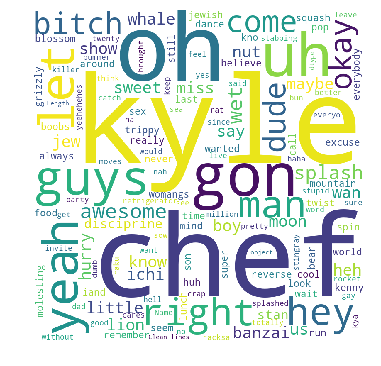

In [73]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

Делаем облако слов по персонажу "Kyle"

In [74]:
kyle = df.loc[df.Character == 'Kyle']
kyle_text = str(kyle['Clean_lines'])

In [75]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [76]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['na', 'back', 'away', 'go'], 
                min_font_size = 10).generate(kyle_text) 

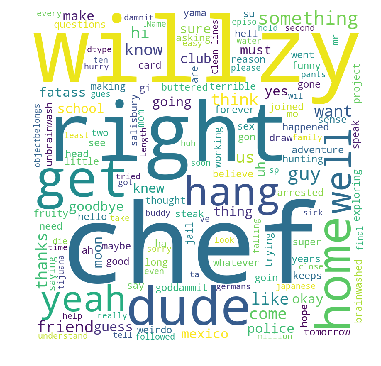

In [77]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

Делаем облако слов по персонажу "Chef"

In [78]:
chef = df.loc[df.Character == 'Chef']
chef_text = str(chef['Clean_lines'])

In [79]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [81]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['na', 'back', 'away', 'go'], 
                min_font_size = 10).generate(chef_text)

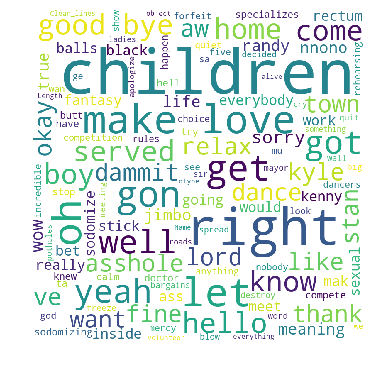

In [82]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

Делаем облако по персонажу "Randy"

In [6]:
randy = df.loc[df.Character == 'Randy']
randy_text = str(randy['Clean_lines'])

In [7]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [10]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['oh', 'got', 'like', 'come', 'get'], 
                min_font_size = 10).generate(randy_text)

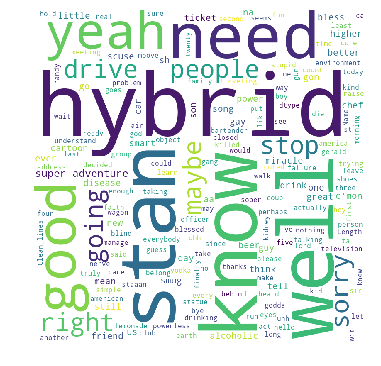

In [11]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

Попробуем кластеризацию

In [87]:
tfidf = TfidfVectorizer()
bowed_lines = tfidf.fit_transform(df['Line'])

In [88]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1, random_state=15)
model.fit(bowed_lines)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=15, tol=0.0001, verbose=0)

In [89]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(6):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 we
 to
 the
 re
 have
 it
 and
 can
Cluster 1:
 you
 to
 the
 do
 re
 are
 it
 that
Cluster 2:
 he
 the
 to
 is
 and
 his
 him
 it
Cluster 3:
 what
 hell
 doing
 the
 you
 that
 is
 are
Cluster 4:
 oh
 god
 my
 no
 uh
 yeah
 jesus
 it
Cluster 5:
 it
 the
 yeah
 that
 is
 no
 to
 and


Идея, конечно, не самая удачная :)